# Task 1
Import csv file and identify null and nan values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("Titanic.csv")

#### Checks for nan values

In [3]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


#### Fill Age, Fare and Embarked with sensible values

In [5]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [6]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [7]:
df['Embarked'] = df['Embarked'].fillna('S')

#### Check for the nan values again

In [8]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

### Fill Cabin Column with valid values

#### Has the wrong output for the *HasCabin* column

The *HasCabin* column expects NaN values to be false. However the *isnull()* method will produce an output *true* because a *NaN* value is a *null* value. To make the *HasCabin* values 'correct', we need to invert them.

In [9]:
df["HasCabin"] = df.Cabin.isnull()

In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


#### Inverted

In [11]:
df["HasCabin"] = ~df.Cabin.isnull()

In [12]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


# Task 2
Adding a feature: Extract the passengers title (mrs. mr. miss) from the Name Column

In [13]:
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [14]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [15]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

#### Replace some titles

In [16]:
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mr'})

In [17]:
df["Title"] = df["Title"].replace(["Rev","Dr","Col","Major","Lady","Sir","Don","Capt","Countess","Jonkheer","Dona"], "Unique")

In [18]:
df['Title'].value_counts()

Mr        758
Miss      264
Mrs       197
Master     61
Unique     29
Name: Title, dtype: int64

In [19]:
sns.countplot(x='Title', data=df);
plt.xticks(rotation=0);

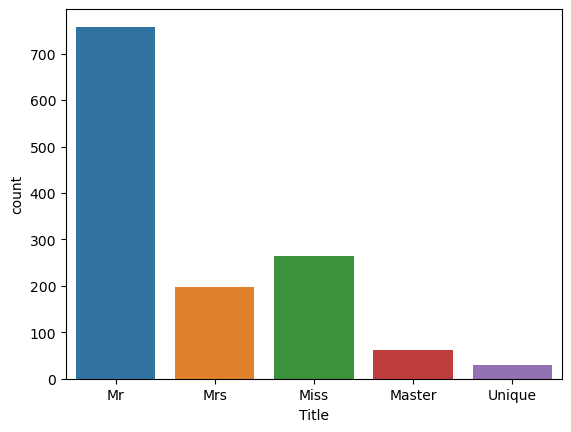

In [20]:
plt.show()

# Task 3
Convert Age and Fare into categorical data

In [21]:
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False )

In [22]:
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False )

In [23]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


# Task 4
Convert dataframe to binary data

Identify columns that we need to drop to convert to a numerical dataset.

In [24]:
df = df.drop(["Name","Ticket","Fare","Cabin"], axis=1)

In [25]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,male,22.0,1,0,S,False,Mr,0,0
1,2,1,female,38.0,1,0,C,True,Mrs,3,3
2,3,3,female,26.0,0,0,S,False,Miss,1,1
3,4,1,female,35.0,1,0,S,True,Mrs,2,3
4,5,3,male,35.0,0,0,S,False,Mr,2,1


#### Converting to binary data

In [26]:
pd.get_dummies(df)

,PassengerId,Pclass,Age,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,22.0,1,0,False,0,0,0,1,0,0,1,0,0,1,0,0
1,2,1,38.0,1,0,True,3,3,1,0,1,0,0,0,0,0,1,0
2,3,3,26.0,0,0,False,1,1,1,0,0,0,1,0,1,0,0,0
3,4,1,35.0,1,0,True,2,3,1,0,0,0,1,0,0,0,1,0
4,5,3,35.0,0,0,False,2,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,False,1,1,0,1,0,0,1,0,0,1,0,0
1305,1306,1,39.0,0,0,True,3,3,1,0,1,0,0,0,0,0,0,1
1306,1307,3,38.5,0,0,False,3,0,0,1,0,0,1,0,0,1,0,0
1307,1308,3,28.0,0,0,False,1,1,0,1,0,0,1,0,0,1,0,0
